In [19]:
import sys

sys.path.append("/home/code")

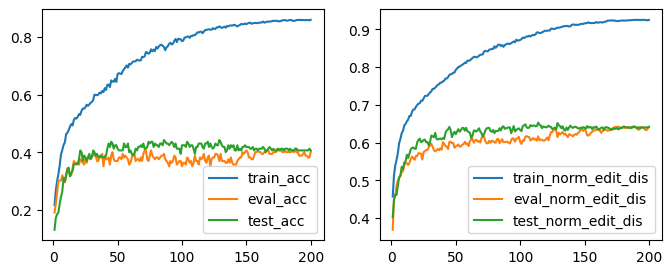

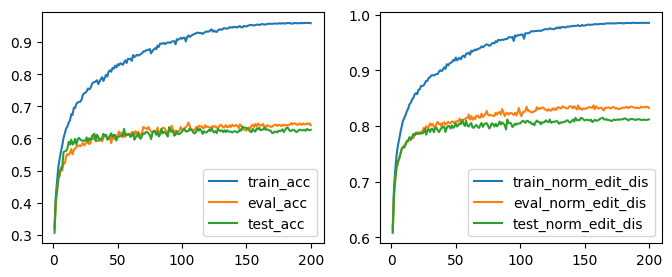

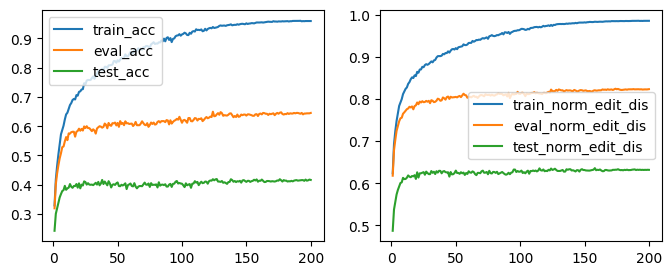

In [7]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt

def smooth(x, window):
    new = []
    for i in range(len(x)):
        r = max(i-window+1, 0)
        q = i
        new.append(sum(x[r:q+1])/(q-r+1))
    return new

def draw_det_graph(id, window=1):
    plt.gcf().set_size_inches(8, 3)
    
    workdb = WorkDB()
    df = workdb.get_report_df(id).sort_values("version")
    
    plt.subplot(1, 2, 1)
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        data = smooth(task_df["precision"], window=window)
        plt.plot(task_df["version"], data, label=f"{task}_precision")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        data = smooth(task_df["recall"], window=window)
        plt.plot(task_df["version"], data, label=f"{task}_recall")   
    plt.legend()
    return plt

def draw_rec_graph(id, window=1):
    plt.gcf().set_size_inches(8, 3)
    workdb = WorkDB()
    df = workdb.get_report_df(id).sort_values("version")
    
    plt.subplot(1, 2, 1)
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        data = smooth(task_df["acc"], window=window)
        plt.plot(task_df["version"], data, label=f"{task}_acc")
    plt.legend()
        
    plt.subplot(1, 2, 2)
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        data = smooth(task_df["norm_edit_dis"], window=window)
        plt.plot(task_df["version"], data, label=f"{task}_norm_edit_dis")    
    plt.legend()
    return plt

draw_rec_graph("rec_PPOCR_sangmu").show()
draw_rec_graph("rec_PPOCR_outsourcing").show()
draw_rec_graph("rec_PPOCR_sangmu_and_outsourcing").show()

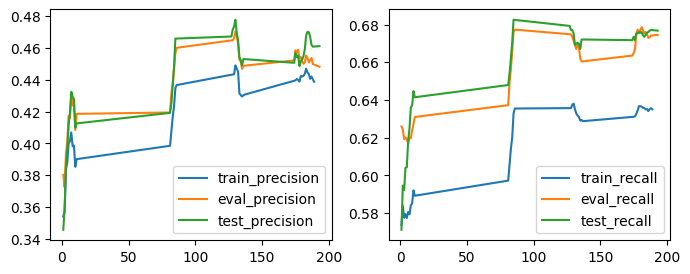

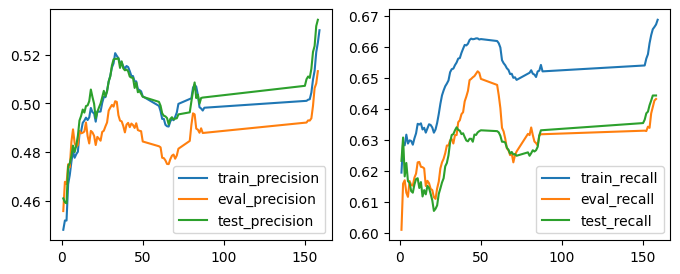

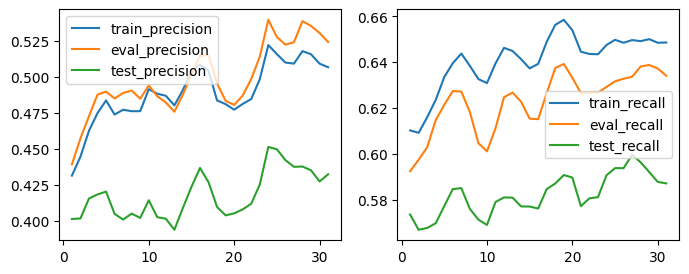

In [8]:
draw_det_graph("det_PPOCR_sangmu", window=5).show()
draw_det_graph("det_PPOCR_outsourcing", window=10).show()
draw_det_graph("det_PPOCR_sangmu_and_outsourcing", window=3).show()